# Using the EPA Air Quality System (AQS) API to get pollution data


## Agenda
1. Open Datahub and start the install of packages

2. Introduce the internet -- series of tubes

3. Introduce the goal and agenda

1. Walk through the EPA API website

2. Look at the API results in the browser for Hawaii

3. Look at the API results in Rstudio

4. Get API results in to dataframes

5. Group work: get results for Berkeley, PM2.5 (hint, both SO2 and PM2.5 are criteria pollutants)

5. Map results for Hawaii sites

6. Group work: map results for Berkeley

7. Graph PM2.5 over time for Hawaii

8. Group work: graph PM2.5 for Berkeley

## Install Packages

In [ ]:
install.packages(c("tidyverse", "httr", "jsonlite", "mapview", "sf"))


Load packages

In [ ]:
library(httr)
library(jsonlite)
library(mapview)
library(sf)
library(ggplot2)
# library(usmap)
# library(rnaturalearth)
library(tidyverse)
library(IRdisplay)
library(maptools)

# What is the internet
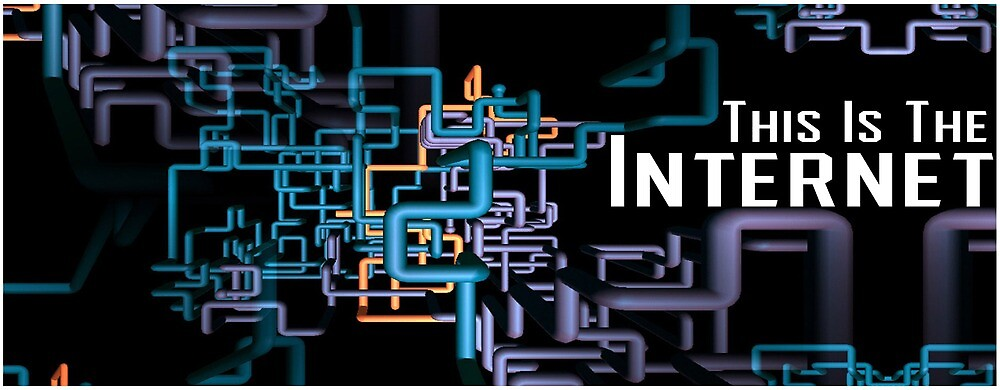

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## HTTP Requests

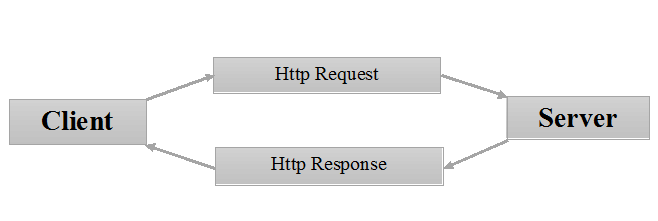

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## RESTful Requests
These requests are made over HTTP via special URL formatting.


### What's the format?
https://mainsite.com/type-of-data?key1=value1&key2=value2

Components:
- the main site
- the type of data you are requesting
- key-value pairs to filter the data you are requesting

### Example
[https://www.thecocktaildb.com/api.php](https://www.thecocktaildb.com/api.php)


Build a drink:
- [pick an alcohol content](https://www.thecocktaildb.com/api/json/v1/1/list.php?a=list) Assume non-alcoholic (because it's before 5pm)
- [pick an ingredient](https://www.thecocktaildb.com/api/json/v1/1/list.php?i=list)
- [pick a glass](https://www.thecocktaildb.com/api/json/v1/1/list.php?g=list)
- [pick a drink category](https://www.thecocktaildb.com/api/json/v1/1/list.php?c=list)



### Request drinks

In [ ]:
url <- "https://www.thecocktaildb.com/api/json/v1/1/filter.php?a=Non_Alcoholic&g=Cocktail_glass&c=Beer&i=Grapes"
response = GET(url)
fromJSON(rawToChar(response$content))

### Request a specific drink

In [ ]:
url <- "https://www.thecocktaildb.com/api/json/v1/1/lookup.php?i=16108"
response = GET(url)
df = fromJSON(rawToChar(response$content))
df$drinks$strInstructions

In [ ]:
df$drinks %>% select(contains("Ingredient"))

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## Agenda
1. Open Datahub and start the install of packages

2. Introduce the internet -- series of tubes

3. Introduce the goal and agenda

1. Walk through the EPA API website

2. Look at the API results in the browser for Hawaii

3. Look at the API results in Rstudio

4. Get API results in to dataframes

5. Group work: get results for Berkeley, PM2.5 (hint, both SO2 and PM2.5 are criteria pollutants)

5. Map results for Hawaii sites

6. Group work: map results for Berkeley

7. Graph PM2.5 over time for Hawaii

8. Group work: graph PM2.5 for Berkeley

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## 4. EPA AQS API Website (API Documentation)
[`https://aqs.epa.gov/aqsweb/documents/data_api.html`](https://aqs.epa.gov/aqsweb/documents/data_api.html)

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## 5. Look at the API results in the browser for Hawaii

Parameter classes:\
[`https://aqs.epa.gov/data/api/list/classes?email=test@aqs.api&key=test`](https://aqs.epa.gov/data/api/list/classes?email=test@aqs.api&key=test)

Parameters in Criteria pollutant class:\
[`https://aqs.epa.gov/data/api/list/parametersByClass?email=test@aqs.api&key=test&pc=CRITERIA`](https://aqs.epa.gov/data/api/list/parametersByClass?email=test@aqs.api&key=test&pc=CRITERIA)\

Sites by county:\
[`https://aqs.epa.gov/data/api/list/sitesByCounty?email=test@aqs.api&key=test&state=15&county=003`](https://aqs.epa.gov/data/api/list/sitesByCounty?email=test@aqs.api&key=test&state=15&county=003)\

Monitors by county:\
[`https://aqs.epa.gov/data/api/monitors/byCounty?email=test@aqs.api&key=test&param=42401&bdate=20150501&edate=20150502&state=15&county=001`](https://aqs.epa.gov/data/api/monitors/byCounty?email=test@aqs.api&key=test&param=42401&bdate=20150501&edate=20150502&state=15&county=001)

Monitors by site:\
[`https://aqs.epa.gov/data/api/monitors/bySite?email=test@aqs.api&key=test&param=42401&bdate=20150501&edate=20150502&state=15&county=003&site=1001`](https://aqs.epa.gov/data/api/monitors/bySite?email=test@aqs.api&key=test&param=42401&bdate=20150501&edate=20150502&state=15&county=003&site=1001)

Daily summary by site:\
[`https://aqs.epa.gov/data/api/dailyData/bySite?email=test@aqs.api&key=test&param=42401&bdate=20150501&edate=20150502&state=15&county=003&site=1001`](https://aqs.epa.gov/data/api/dailyData/bySite?email=test@aqs.api&key=test&param=42401&bdate=20150501&edate=20150502&state=15&county=003&site=1001)

Daily summary by county:\
[`https://aqs.epa.gov/data/api/dailyData/byCounty?email=test@aqs.api&key=test&param=42401&bdate=20150501&edate=20150502&state=15&county=003`](https://aqs.epa.gov/data/api/dailyData/byCounty?email=test@aqs.api&key=test&param=42401&bdate=20150501&edate=20150502&state=15&county=003)



Sample Data by site:\
[`https://aqs.epa.gov/data/api/sampleData/bySite?email=test@aqs.api&key=test&param=42401&bdate=20150501&edate=20150502&state=15&county=003&site=1001`]()

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## 6. Look at the API results in R

In [ ]:
url <- ""
response <- GET(url)
response

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## Let's construct a URL

We want the following components

In [ ]:
state = "15"           # state FIPS code for HI
county = "003"         # county FIPS code in HI
param = "42401"        # this is the code for SO2
bdate = "20150101"
edate = "20150101"
testemail = "test@aqs.api"
testkey = "test"

## It'll look like this
`"https://aqs.epa.gov/data/api/monitors/byCounty?email=test@aqs.api&key=test&param=42401&bdate=20150501&edate=20150501&state=15&county=003"`

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## Method 1: `paste0()`

In [ ]:
paste("a", "b")

In [ ]:
paste0("a", "b")

In [ ]:
paste0("a", "b", "c", "d")

In [ ]:
url1 <- paste0("https://aqs.epa.gov/data/api/dailyData/byCounty?email=", testemail, 
               "&key=", testkey, "&param=", param, 
               "&bdate=", bdate, "&edate=", edate, 
               "&state=", state, "&county=", county)
response1 <- GET(url)
response1

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## Method 2: `sprintf()`

In [ ]:
sprintf("Put text here: %s", "TEST")

In [ ]:
sprintf("Put text here: [%s] and here: [%s]", "TEST1", "TEST2")

In [ ]:
sprintf("I would like some %s and %s", "vegan beef stromboli", "diet coke")

In [ ]:
url2 <- sprintf("https://aqs.epa.gov/data/api/dailyData/byCounty?email=%s&key=%s&param=%s&bdate=%s&edate=%s&state=%s&county=%s",
                testemail, testkey, param, bdate, edate, state, county)
response2 <- GET(url)
response2

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## Method 3: `GET` has it's own method: `query`

In [ ]:
url3 <- "https://aqs.epa.gov/data/api/dailyData/byCounty"
response3 <- GET(url3,
              query = list(param = param, state = state, county = county,
                           bdate = bdate, edate = edate, 
                           email = testemail, key = testkey))
response3

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## 7. Get API results in to dataframes



In [ ]:
url <= "https://aqs.epa.gov/data/api/list/classes?email=test@aqs.api&key=test"
response = GET(url)
output <- fromJSON(rawToChar(response$content))
output
names(output)

In [ ]:
dataframe <- output$Data

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## Make a function to get daily data and put data into dataframe

In [ ]:
daily_summary_by_county <- function(param, state, county, bdate, edate, email, api_key) {
    
  url1 <- "https://aqs.epa.gov/data/api/dailyData/byCounty"
    
  result <- GET(url1,
                query = list(param = param, state = state, county = county,
                             bdate = bdate, edate = edate, 
                             email = email, key = api_key))
    
  output <- fromJSON(rawToChar(result$content))
    
  data = output$Data
    
  return(data)
}



df = daily_summary_by_county(param, state, county, bdate, edate, testemail, testkey)
head(df, n=2)

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## 8. Group work: get results for Berkeley, PM2.5
(hint, both SO2 and PM2.5 are criteria pollutants)



In [ ]:
url <- ""


<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## 9. Map results for Hawaii sites


In [ ]:
state = "15"
county = "003"
param = "42401"
bdate = "20150101"
edate = "20150101"
testemail = "test@aqs.api"
testkey = "test"

daily_summary_by_county <- function(param, state, county, bdate, edate, email, api_key) {
  url1 <- "https://aqs.epa.gov/data/api/dailyData/byCounty"
  result <- GET(url1,
                query = list(param = param, state = state, county = county,
                             bdate = bdate, edate = edate, 
                             email = email, key = api_key))
  output <- fromJSON(rawToChar(result$content))
  data = output$Data
  return(data)
}

data = daily_summary_by_county(param, state, county, bdate, edate, testemail, testkey)

head(data)

In [ ]:
names(data)

In [ ]:
data = data %>% filter(sample_duration == "24-HR BLK AVG")

In [ ]:
datum = unique(data$datum)[1]
crs1 <- st_crs(datum)

m=mapview(data, xcol = "longitude", ycol = "latitude", zcol = "arithmetic_mean", crs = crs1, grid = FALSE)
mapshot(m, url = "demo_map.html")
display_html('<iframe src="demo_map.html" width="800" height ="500"></iframe>')

In [ ]:
plot_24hr_blockavg <- function(df) {
    # Filter Data to get only 24-hour block average (daily averages)
    data = data %>% filter(sample_duration == "24-HR BLK AVG")
    
    # Get datum (mapping code to specify how the map is shaped)
    datum = unique(data$datum)[1]
    crs1 <- st_crs(datum)
    
    # Plot the map
    m=mapview(data, xcol = "longitude", ycol = "latitude", zcol = "arithmetic_mean", crs = crs1, grid = FALSE)
    mapshot(m, url = "demo_map.html")
    display_html('<iframe src="demo_map.html" width="800" height ="500"></iframe>')
}

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## 10. Group work: map results for Berkeley


<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## 11. Graph PM2.5 over time for Hawaii

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## 12. Group work: graph PM2.5 for Berkeley